In [1]:
%run lm_ode.ipynb

In [2]:
import matplotlib.pyplot as plt

# Model 1: Homogeneous gas phase reaction model
$$2NO+O_2\leftrightarrow2NO_2$$
is described by the following equation
$$\frac{dy}{dt}=k_1(126.2-y)(91.9-y)^2-k_2y^2;~~y(0)=0$$

## Scaling for parameter estimation
$$\frac{du}{d\bar{t}}=k_1t_cy_c^2(126.2/y_c-u)(91.9/y_c-u)^2-t_ck_2y_cu^2$$
Let $y_c=91.9$ and $t_c=t_\text{end}$,
$$\frac{du}{d\bar{t}}=91.9^2t_\text{end}k_1(126.2/91.9-u)(1-u)^2-91.9t_\text{end}k_2u^2$$
$$\frac{du}{d\bar{t}}=\bar{k}_1(126.2/91.9-u)(1-u)^2-\bar{k}_2u^2$$
where $k_1=\frac{\bar{k}_1}{91.9^2t_\text{end}}$ and $k_2=\frac{\bar{k}_2}{91.9t_\text{end}}$.

In [3]:
def model1_scaled(u,kbar):
    dudt = kbar[0]*(126.2/91.9-u)*(1-u)**2-kbar[1]*u**2
    return dudt

In [4]:
yhat=np.array([[0,1.4,6.3,10.5,14.2,17.6,21.4,23.0,27.0,30.5,34.4,38.8,41.6,43.5,45.3]])
t = np.array([0,1,2,3,4,5,6,7,9,11,14,19,24,29,39])
k = np.array([0.4577e-5,0.2796e-3])
yc = 91.9
uhat = yhat/yc
u0 = uhat[0]
tc = t[-1]
tbar = t/tc
Q = np.eye(1)
Kc = np.array([[91.9**2*tc,0],[0,91.9*tc]])
kbar = Kc@k

In [5]:
res = integrator_jacobian(model1_scaled,u0,kbar,tbar)

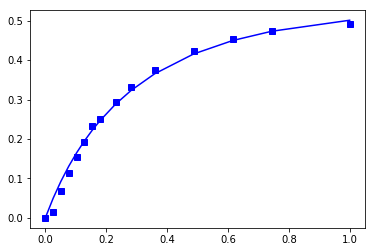

In [6]:
plt.plot(tbar,uhat[0],'bs')
plt.plot(tbar,res[0][0],'b')

## Paramter estimation with given paramters

In [7]:
k_est = gn(model1_scaled,uhat,Q,kbar,tbar,[1e-6,1e-8,1e-8,200])

Iter | Obj func | grad
    0|1.2945e-03|  2.22e-06
    1|1.2945e-03|  9.57e-07
    2|1.2945e-03|  1.17e-06
    3|1.2945e-03|  2.71e-07
    4|1.2946e-03|  8.10e-07
    5|1.2947e-03|  1.82e-07
    6|1.2945e-03|  4.87e-07
    7|1.2946e-03|  5.68e-07
    8|1.2945e-03|  1.75e-07
    9|1.2946e-03|  1.29e-06
   10|1.2945e-03|  8.19e-07
   11|1.2945e-03|  2.92e-07
   12|1.2945e-03|  2.95e-07
   13|1.2945e-03|  2.92e-07
   14|1.2945e-03|  9.46e-07
   15|1.2945e-03|  8.07e-07
   16|1.2945e-03|  1.50e-06
   17|1.2946e-03|  2.73e-06
   18|1.2946e-03|  5.57e-07
   19|1.2945e-03|  7.22e-07
   20|1.2945e-03|  2.46e-08
   21|1.2945e-03|  1.92e-08
   22|1.2945e-03|  1.04e-06
   23|1.2945e-03|  7.54e-07
   24|1.2947e-03|  1.76e-06
   25|1.2945e-03|  3.33e-06
   26|1.2945e-03|  2.72e-07
   27|1.2945e-03|  1.41e-06
   28|1.2945e-03|  4.53e-07
   29|1.2947e-03|  2.93e-07
   30|1.2945e-03|  1.73e-06
   31|1.2946e-03|  1.17e-07
   32|1.2945e-03|  5.43e-07
   33|1.2947e-03|  6.61e-07
   34|1.2946e-03|  5.47e-

In [8]:
kbar

array([1.50759531, 1.00219096])

In [9]:
k_est

[array([1.50759531, 1.00219096]),
 array([[0.        , 0.04950363, 0.09275514, 0.13086438, 0.16468065,
         0.19486022, 0.22194371, 0.24634302, 0.28844719, 0.32330266,
         0.36527389, 0.41564527, 0.44972064, 0.47320485, 0.50118133]]),
 [56, 'g']]

In [10]:
k0 = np.array([1e-6,1e-6])
kbar0 = Kc@k0

In [11]:
k_est2 = gn(model1_scaled,uhat,Q,kbar0,tbar,[1e-6,1e-8,1e-8,200])

Iter | Obj func | grad
    0|2.3750e-01|  7.55e-01
    1|1.0300e-01|  1.25e-01
    2|2.4098e+02|  2.63e+02
    3|3.0270e+01|  1.16e+01
    4|2.6289e+00|  3.25e+00
    5|2.7591e-01|  2.23e-01
    6|5.7170e-02|  2.22e-01
    7|8.7079e-03|  4.04e-02
    8|1.5547e-03|  4.68e-03
    9|1.2948e-03|  2.44e-04
   10|1.2947e-03|  2.41e-06
   11|1.2945e-03|  2.02e-06
   12|1.2945e-03|  7.78e-07
   13|1.2945e-03|  1.60e-08
   14|1.2945e-03|  6.39e-07
   15|1.2945e-03|  8.31e-07
   16|1.2945e-03|  1.42e-06
   17|1.2946e-03|  1.25e-06
   18|1.2945e-03|  1.14e-06
   19|1.2947e-03|  1.59e-06
   20|1.2945e-03|  1.52e-06
   21|1.2946e-03|  1.34e-06
   22|1.2945e-03|  1.42e-06
   23|1.2945e-03|  1.02e-06
   24|1.2945e-03|  5.55e-07
   25|1.2946e-03|  3.46e-07
   26|1.2945e-03|  8.69e-07
   27|1.2946e-03|  1.04e-06
   28|1.2945e-03|  1.02e-06
   29|1.2946e-03|  1.24e-06
   30|1.2945e-03|  2.74e-07
   31|1.2947e-03|  5.15e-07
   32|1.2945e-03|  7.22e-07
   33|1.2945e-03|  3.24e-07
   34|1.2946e-03|  3.51e-

In [12]:
k_est2

[array([1.5075951, 1.0021901]),
 array([[0.        , 0.04950362, 0.09275513, 0.13086437, 0.16468063,
         0.1948602 , 0.22194368, 0.246343  , 0.28844716, 0.32330266,
         0.36527386, 0.41564521, 0.44972072, 0.47320478, 0.50118139]]),
 [171, 'g']]